# Comparing Original and Updated Population and GDP

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import re, os
import matplotlib.pyplot as plt
%matplotlib inline

### Initial paths set-up

Set `projdir` on your system, then everything else is defined relative to that. `pwd` will just give the directory that this Jupyter notebook is housed in.

In [11]:
projdir = os.getcwd()
datdir = projdir + "/../ciam-code/data"
plotdir = projdir + "/../ciam-code/figures"
ciamdir = projdir + "/../../MimiCIAM.jl"

If the plot directory `plotdir` doesn't exist, make it.

In [12]:
if not os.path.exists(plotdir):
    os.makedirs(plotdir)
print("Will save plots to ",plotdir)

Will save plots to  /Users/aewsma/codes/CIAM_uncertainty_propagation/work_baseline_comparisons/../ciam-code/figures


### Get GDP and population from SSPs

Initialize storage of population, GDP per capita, and total GDP for each CIAM region. Will aggregate to World Bank regions below.

In [176]:
ypcc, pop, gdp, dfG, dfP = {}, {}, {}, {}, {}

In [177]:
for version in ["SSP1","SSP3","SSP5"]:
    # GDP per capita
    ypcc[version] = pd.read_csv(projdir+"/../ciam-code/data/ssp/ypcc_IIASAGDP_"+version+"_v9_130219.csv")
    # population
    pop[version] = pd.read_csv(projdir+"/../ciam-code/data/ssp/pop_IIASAGDP_"+version+"_v9_130219.csv")

### Get GDP and population from the original CIAM forcing

In [178]:
version = "orig"

ypcc[version] = pd.read_csv(ciamdir+"/data/input/ypcc.csv")
pop[version] = pd.read_csv(ciamdir+"/data/input/pop.csv")

### What are the versions of the forcing data to compare?

Define the versions of the population and GDP forcing to compare

In [179]:
versions = list(pop.keys())

### Aggregating the CIAM regions to the World Bank regions

Define the CIAM regions (roughly, nation-scale)

In [180]:
regions = ypcc["orig"].columns[1:] # important to have them as names just in case the order is different

Calculate GDP from GDP per capita (ypcc) and population (pop)

In [181]:
# 1e6 since population is in units of millions
# and /1e9 to get in units of billions US$2010
for version in versions:
    gdp[version] = ypcc[version][regions]*pop[version][regions]*1e6/1e9

Get the 7 World Bank regions (roughly continental-scale)

In [182]:
wbsegs = pd.read_csv(projdir+"/../ciam-code/data/segments_regions_WB.csv")
regions_wb = list(wbsegs["global region"].unique())

Aggregate the CIAM regions to the World Bank regions, for both population and GDP

In [183]:
for version in versions:
    dfG[version], dfP[version] = pd.DataFrame(), pd.DataFrame()
    for rgn in regions_wb:
        rgns_this_rgn = wbsegs.loc[wbsegs["global region"]==rgn, "regions"].unique()
        dfG[version][rgn] = gdp[version][rgns_this_rgn].apply(sum,axis=1)
        dfP[version][rgn] = pop[version][rgns_this_rgn].apply(sum,axis=1)

What years do we have?

In [184]:
years = list(range(2010,2210,10))

### Comparison figure for popoulation

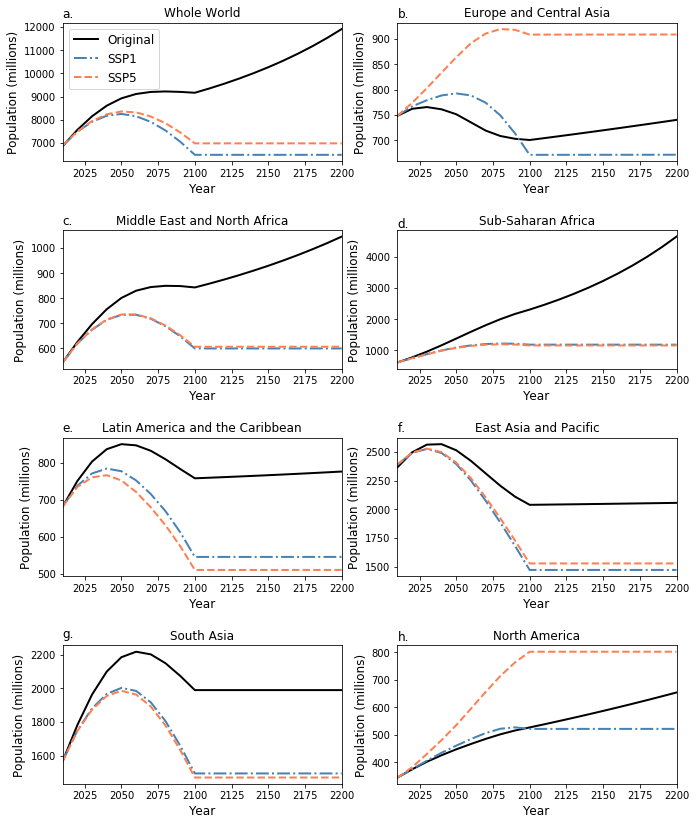

In [187]:
fig, ax = plt.subplots(4,2,figsize=(11,14))
fig.subplots_adjust(hspace=.5)
panels = ["a.","b.","c.","d.","e.","f.","g.","h."]

# whole world
rgn = "World"
pan = 0
ax[0][0].plot(years, dfP["orig"].sum(axis=1), linewidth=2, color="black", label="Original")
ax[0][0].plot(years, dfP["SSP1"].sum(axis=1), linewidth=2, color="steelblue", linestyle="-.", label="SSP1")
ax[0][0].plot(years, dfP["SSP5"].sum(axis=1), linewidth=2, color="coral", linestyle="--", label="SSP5")
ax[0][0].set_xlabel("Year", fontsize=12)
ax[0][0].set_ylabel("Population (millions)", fontsize=12)
ax[0][0].legend(fontsize=12, frameon=True)
ax[0][0].set_title("Whole World")
ax[0][0].set_xlim([2010,2200])
ylims = ax[0][0].get_ylim(); top = ylims[1]*1.02; ax[0][0].text(2010,top, panels[pan], fontsize=12);

# regions
rgn = regions_wb[0]
pan += 1
ax[0][1].plot(years, dfP["orig"][rgn], linewidth=2, color="black")
ax[0][1].plot(years, dfP["SSP1"][rgn], linewidth=2, color="steelblue", linestyle="-.")
ax[0][1].plot(years, dfP["SSP5"][rgn], linewidth=2, color="coral", linestyle="--")
ax[0][1].set_xlabel("Year", fontsize=12)
ax[0][1].set_ylabel("Population (millions)", fontsize=12)
ax[0][1].set_title(rgn)
ax[0][1].set_xlim([2010,2200])
ylims = ax[0][1].get_ylim(); top = ylims[1]*1.01; ax[0][1].text(2010,top, panels[pan], fontsize=12);

ir = 1
for row in range(1,4):
    for col in range(2):
        rgn = regions_wb[ir]
        ir += 1
        pan += 1
        ax[row][col].plot(years, dfP["orig"][rgn], linewidth=2, color="black")
        ax[row][col].plot(years, dfP["SSP1"][rgn], linewidth=2, color="steelblue", linestyle="-.")
        ax[row][col].plot(years, dfP["SSP5"][rgn], linewidth=2, color="coral", linestyle="--")
        ax[row][col].set_xlabel("Year", fontsize=12)
        ax[row][col].set_ylabel("Population (millions)", fontsize=12)
        ax[row][col].set_title(rgn)
        ax[row][col].set_xlim([2010,2200])
        ylims = ax[row][col].get_ylim(); top = ylims[1]*1.02; ax[row][col].text(2010,top, panels[pan], fontsize=12);

fig.savefig(plotdir+"/population_update_comparison.pdf", bbox_inches='tight')

### Comparison figure for GDP

GDP under SSP5 globally around USD1,000 trillion by 2100 (Riahi et al 2017). But CIAM segments are only coastal areas, so expect a bit less. Checks out, with around USD820 trillion by 2100 (below).

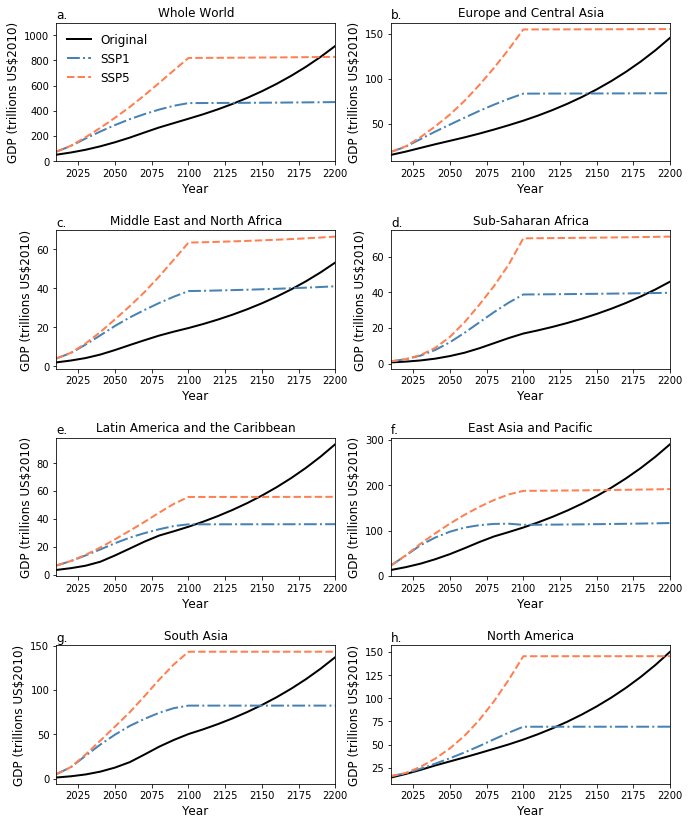

In [173]:
fig, ax = plt.subplots(4,2,figsize=(11,14))
fig.subplots_adjust(hspace=.5)
panels = ["a.","b.","c.","d.","e.","f.","g.","h."]

# whole world
rgn = "World"
pan = 0
ax[0][0].plot(years, dfG["orig"].sum(axis=1)/1e3, linewidth=2, color="black", label="Original")
ax[0][0].plot(years, dfG["SSP1"].sum(axis=1)/1e3, linewidth=2, color="steelblue", linestyle="-.", label="SSP1")
ax[0][0].plot(years, dfG["SSP5"].sum(axis=1)/1e3, linewidth=2, color="coral", linestyle="--", label="SSP5")
ax[0][0].set_xlabel("Year", fontsize=12)
ax[0][0].set_ylabel("GDP (trillions US$2010)", fontsize=12)
ax[0][0].legend(fontsize=12, frameon=False)
ax[0][0].set_title("Whole World")
ax[0][0].set_xlim([2010,2200]); ax[0][0].set_ylim([0,1100])
ylims = ax[0][0].get_ylim(); top = ylims[1]*1.03; ax[0][0].text(2010,top, panels[pan], fontsize=12);

# regions
rgn = regions_wb[0]
pan += 1
ax[0][1].plot(years, dfG["orig"][rgn]/1e3, linewidth=2, color="black")
ax[0][1].plot(years, dfG["SSP1"][rgn]/1e3, linewidth=2, color="steelblue", linestyle="-.")
ax[0][1].plot(years, dfG["SSP5"][rgn]/1e3, linewidth=2, color="coral", linestyle="--")
ax[0][1].set_xlabel("Year", fontsize=12)
ax[0][1].set_ylabel("GDP (trillions US$2010)", fontsize=12)
ax[0][1].set_title(rgn)
ax[0][1].set_xlim([2010,2200])
ylims = ax[0][1].get_ylim(); top = ylims[1]*1.03; ax[0][1].text(2010,top, panels[pan], fontsize=12);

ir = 1
for row in range(1,4):
    for col in range(2):
        rgn = regions_wb[ir]
        ir += 1
        pan += 1
        ax[row][col].plot(years, dfG["orig"][rgn]/1e3, linewidth=2, color="black")
        ax[row][col].plot(years, dfG["SSP1"][rgn]/1e3, linewidth=2, color="steelblue", linestyle="-.")
        ax[row][col].plot(years, dfG["SSP5"][rgn]/1e3, linewidth=2, color="coral", linestyle="--")
        ax[row][col].set_xlabel("Year", fontsize=12)
        ax[row][col].set_ylabel("GDP (trillions US$2010)", fontsize=12)
        ax[row][col].set_title(rgn)
        ax[row][col].set_xlim([2010,2200])
        ylims = ax[row][col].get_ylim(); top = ylims[1]*1.03; ax[row][col].text(2010,top, panels[pan], fontsize=12);

fig.savefig(plotdir+"/GDP_update_comparison.pdf", bbox_inches="tight")